In [10]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
%matplotlib inline

In [2]:
import getweather 

def fillnans(array):
    x = np.arange(len(array))
    good = ~np.isnan(array)
    
    return np.interp(x, x[good], array[good])

In [6]:
hilo = getweather.getyear('HILO', ['TMIN', 'TMAX'], 2000)

In [7]:
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])

In [8]:
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMAX'])

(19.102739726027398, 14.4, 30.0)

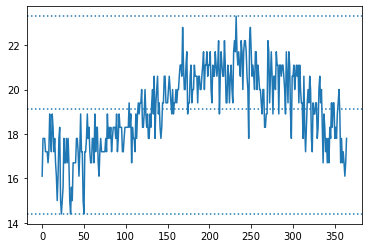

In [11]:
pp.plot(hilo['TMIN'])

for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    pp.axhline(value, linestyle = ':')

In [12]:
mean, err  = np.mean(hilo['TMIN']), math.sqrt(np.var(hilo['TMIN']))

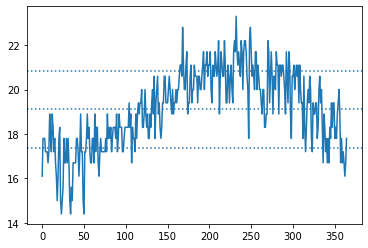

In [13]:
pp.plot(hilo['TMIN'])

for value in [mean, mean - err, mean + err]:
    pp.axhline(value, linestyle = ':')

In [20]:
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PCRP']

ValueError: no field of name PCRP

In [17]:
pp.plot(rain)

NameError: name 'rain' is not defined

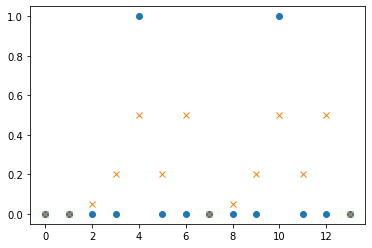

In [21]:
x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])
#add in the second stage
mask = np.array([0,0.5,0.2,0.5,0.2,0.05])
y = np.correlate(x, mask, 'same')

#plot in the first stage
pp.plot(x, 'o')

#add in the 2nd stage
pp.plot(y, 'x')

In [22]:
np.ones(10)/ 10

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

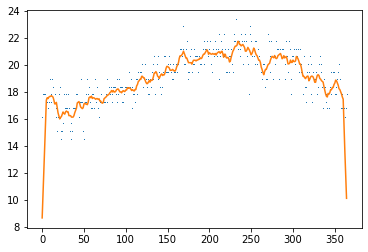

In [24]:
pp.plot(hilo['TMIN'], ',', ms = 3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same')) #same vs valid

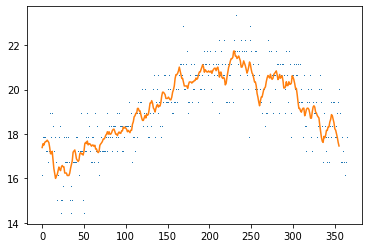

In [25]:
pp.plot(hilo['TMIN'], ',', ms = 3)
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid')) #same as valid

In [26]:
def smooth(array, window = 10, mode = 'valid'):
    return np.correlate(array, np.ones(window)/window, mode)

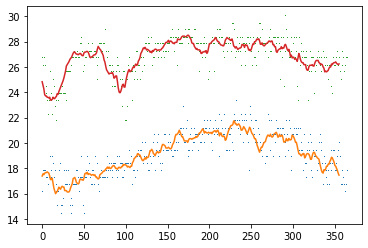

In [28]:
pp.plot(hilo['TMIN'], ',', ms = 3)
pp.plot(smooth(hilo['TMIN'], 10))

pp.plot(hilo['TMAX'], ',', ms = 3)
pp.plot(smooth(hilo['TMAX'], 10))


In [31]:
def plotsmooth(station, year):
    stationdata = getweather.getyear(station, ['TMIN', 'TMAX'], year)
    
    for obs in ['TMIN', 'TMAX']:
        stationdata[obs] = fillnans(stationdata[obs])
        
        #thinner pts
        pp.plot(stationdata[obs], '.', ms = 1)
        pp.plot(range(10, 356), smooth(stationdata[obs], 20))
    pp.title(station)
    pp.axis(xmin = 1, xmax = 365, ymin = 10, ymax =45)
        
        

(1.0, 365.0, 15, 30)

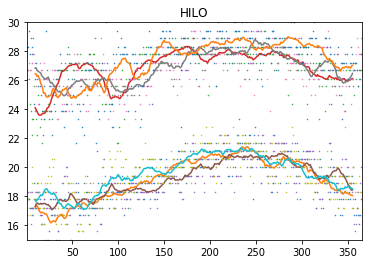

In [32]:
plotsmooth('HILO', 2000)
plotsmooth('HILO', 2001)
plotsmooth('HILO', 2002)
#add later
pp.axis(ymin = 15, ymax =30)


Using ('USW00094728', 40.7789, -73.9692, 39.6, 'NY', 'NEW YORK CNTRL PK TWR', '', 'HCN', '72506').
Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO LINDBERGH FLD', 'GSN', '', '72290').
Using ('USW00014922', 44.8831, -93.2289, 265.8, 'MN', 'MINNEAPOLIS/ST PAUL AP', 'GSN', 'HCN', '72658').


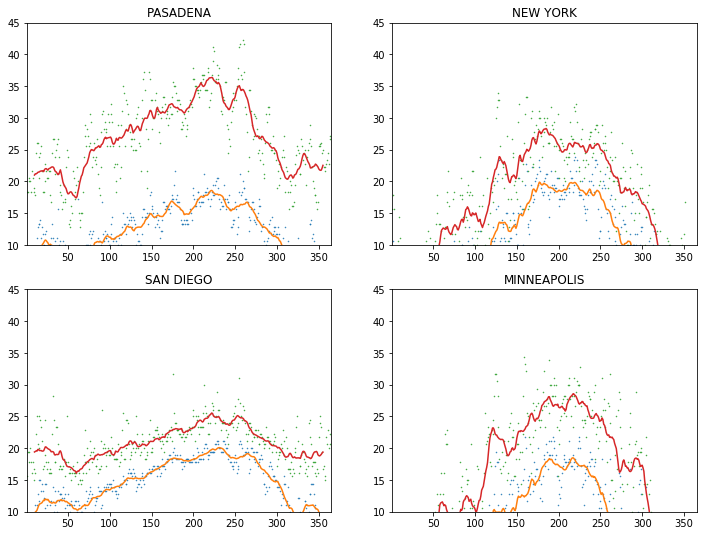

In [33]:
#later
pp.figure(figsize =(12,9))

for i, city in enumerate(['PASADENA', "NEW YORK", "SAN DIEGO", "MINNEAPOLIS"]):
    pp.subplot(2,2,i+1)
    plotsmooth(city,2000)